<a href="https://colab.research.google.com/github/joseph-tech-dev/machine-learning/blob/main/mnist_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape for CNN input: (batch, height, width, channels)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.1,
                    batch_size=64)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.7771 - loss: 0.6829 - val_accuracy: 0.9817 - val_loss: 0.0634
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9556 - loss: 0.1505 - val_accuracy: 0.9860 - val_loss: 0.0469
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9678 - loss: 0.1061 - val_accuracy: 0.9882 - val_loss: 0.0415
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9756 - loss: 0.0814 - val_accuracy: 0.9898 - val_loss: 0.0381
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9781 - loss: 0.0747 - val_accuracy: 0.9893 - val_loss: 0.0392


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0339
Test accuracy: 0.9914


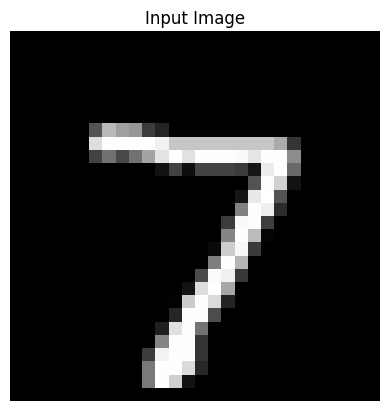

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Label: 7


In [ ]:
import numpy as np

# Predict one image
index = 0
image = x_test[index]
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


In [ ]:
# Save model
model.save('my_mnist_cnn_model.keras')

# Load model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
